# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)
image_pred = pd.read_csv("image_predictions.tsv", sep= "\t")
image_pred.head()    


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [3]:
df_list =[]

with open('tweet-json.txt', 'r') as tweet_data:
    for line in tweet_data:
        data = json.loads(line)
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        
# list of dictionaries to append
        df_list.append({'tweet_id': tweet_id,
                'created_at' : created_at,
                'favorite_count' : favorite_count,
                'retweet_count' : retweet_count})

API_df = pd.DataFrame(df_list, columns=['tweet_id', 'created_at', 'favorite_count', 'retweet_count']
                )
API_df.head()

,tweet_id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [4]:
# Assessing data visually on twitter-archive-enhanced.csv
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Assessing data programmatically on twitter-archive-enhanced.csv shows that the data type for "tweet_id" and "timestamp" are objects instead of int, and date type respectively. .

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
#Assessing data programmatically on "twitter-archive-enhanced.csv" table shows that there are some outliers in the "rating_numerator" and "rating_denominator"
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [7]:
# Assessing data progammatically on "twitter-archive-enhanced.csv"  shows that there are invalid names beginning with lower case  on the "name" column
df.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
Daisy          7
Buddy          7
an             7
Bailey         7
Oscar          6
Milo           6
Jax            6
Rusty          6
Leo            6
Jack           6
Dave           6
Scout          6
Koda           6
Stanley        6
Bella          6
Bentley        5
            ... 
Derby          1
Akumi          1
Tater          1
Mo             1
Dook           1
old            1
Koko           1
Chaz           1
Dotsy          1
Traviss        1
Alexander      1
Ester          1
Bradlay        1
Vince          1
Odin           1
Stella         1
Mauve          1
Tuco           1
Ricky          1
Meera          1
Rilo           1
Jeffri         1
Julius         1
Charleson      1
Cecil          1
Harlso         1
Brownie        1
Chubbs        

In [8]:
#Assessing data programmatically on "twitter-archive-enhanced.csv" table shows there are re-tweets in the original re-tweet based on the "text" column containing "RT @" in index 19.
df.text.head(30)

0     This is Phineas. He's a mystical boy. Only eve...
1     This is Tilly. She's just checking pup on you....
2     This is Archie. He is a rare Norwegian Pouncin...
3     This is Darla. She commenced a snooze mid meal...
4     This is Franklin. He would like you to stop ca...
5     Here we have a majestic great white breaching ...
6     Meet Jax. He enjoys ice cream so much he gets ...
7     When you watch your owner call another dog a g...
8     This is Zoey. She doesn't want to be one of th...
9     This is Cassie. She is a college pup. Studying...
10    This is Koda. He is a South Australian decksha...
11    This is Bruno. He is a service shark. Only get...
12    Here's a puppo that seems to be on the fence a...
13    This is Ted. He does his best. Sometimes that'...
14    This is Stuart. He's sporting his favorite fan...
15    This is Oliver. You're witnessing one of his m...
16    This is Jim. He found a fren. Taught him how t...
17    This is Zeke. He has a new stick. Very pro

In [9]:
#Assessing data programmatically on "twitter-archive-enhanced.csv" table shows there are many null values in column. This has few or no analytics to provide.
df['in_reply_to_status_id'].isnull().sum()





2278

In [10]:
#Assessing data programmatically on "twitter-archive-enhanced.csv" table shows there are many null values in column. This has few or no analytics to provide.
df['in_reply_to_user_id'].isnull().sum()

2278

In [11]:
#Assessing data programmatically on "twitter-archive-enhanced.csv" table shows there are many null values in column. This has few or no analytics to provide.
df['retweeted_status_id'].isnull().sum()

2175

In [12]:
#Assessing data programmatically on "twitter-archive-enhanced.csv" table shows there are many null values in column. This has few or no analytics to provide.
df['in_reply_to_status_id'].isnull().sum()

2278

In [13]:
#Assessing data programmatically on "twitter-archive-enhanced.csv" table shows there are many null values in column. This has few or no analytics to provide.
df['retweeted_status_user_id'].isnull().sum()


2175

In [14]:
#Assessing data programmatically on "image_prediction" table shows that the data type for "tweet_id" column is an integer instead of an object.
#The columns labelled "p1", "p1_conf",	"p1_dog	p2", "p2_conf",	"p2_dog	p3", "p3_conf",	"p3_dog" on "image_predictation" table are not explict. They need to be re-named. 
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#Assessing data programmatically on "image_prediction" table shows that there are duplicate urls with predictions.
sum(image_pred['jpg_url'].duplicated())

66

In [16]:
#Assessing data programmatically on 'tweet-json.txt' shows that the "tweet_id"  and "created_at" are integers and object  instead of object and  date type.
API_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
created_at        2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


### Quality issues

1.The "tweet_id" column on "twitter-archive-enhanced" table should be an object string not an integer.

2.The "Timestamp" column on "twitter-archive-enhanced" table is a string instead of a date type.

3.Some values in "rating_numerator" and "rating_denominator" on "twitter-archive-enhanced" table are outliers because values are out of range.

4.There are  dogs with wrong name on  the "name"  column on the "twitter-archive-enhanced" table which should be replace with "None".

5:There are re-tweets mixed up with original tweets based on "RT @" in the value of the "text" column.

6.The columns labelled "in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", and "retweeted_status_timestamp" on "twitter-archive-enhanced" have a lot of missing values. As a result, it will not be relevant for analytics.
 
7.The "tweet_id" on "image_predictation" table should be an object string not an integer.

8.There are duplicate urls on the "jpg_url" column on the  "image_prediction" table for the same image.

9.The"tweet_id" on "tweet-json.txt"" table should be an object string not an integer.

10.The column labelled 'created_at'  on "tweet-json.txt" table is an object instead of a date type.

### Tidiness issues
1.The columns labelled "name", "doggo","floofer","pupper", and "puppo" on "twitter-archive-enhanced" table needs to be normalised to one column because it has similar attributes.

2.The columns labelled "p2", "p2_conf",	"p2_dog", "p3", "p3_conf",	"p3_dog" on "image_predictation" table will be dropped to only use some columns for prediction.

3.The columns names will be renamed from "p1", "p1_conf", and "p1_dog" to "prediction", "confidence_level", and "validation" for appropriate communication.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
df_copy=df.copy()
image_pred_copy=image_pred.copy()
API_df_copy=API_df.copy()



### Quality issues

### Issue #1: The "tweet_id" column on "twitter-archive-enhanced"  table should be an object string not an integer.

#### Define: Data type  of "tweet_id" will be converted to strings for the different tables.

#### Code

In [18]:
# convert "tweet_id" to object data type
df_copy['tweet_id'] = df_copy['tweet_id'].astype(str)


#### Test

In [19]:
#validate the outcome of the code
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Issue #2: The "timestamp" column on "twitter-archive-enhanced" table is a string instead of a date type.

#### Define: "Timestamp" needs to be converted to date type for easy analytics

#### Code

In [20]:
# Convert "timestamp" to date column.
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

#### Test

In [21]:
# Validate the outcome of the result.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Issue #3:Some values in "rating_numerator" and "rating_denominator" on "twitter-archive-enhanced" table are outliers because values are out of range.

#### Define: Values out of range needs to be dropped by dividing the "rating_numerator" by the  "rating_denominator"  to get the number within range and erdaicate values that are out of range. 

#### Code

In [22]:
df_copy['overall_rating'] = df_copy['rating_numerator']/df_copy['rating_denominator']

#### Test

In [23]:
df_copy['overall_rating'].value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
inf             1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
Name: overall_rating, dtype: int64

#### Code

In [24]:
# values out of range are removed
df_copy.drop(df_copy[df_copy['overall_rating'] > 2.7].index, inplace = True)


#### Test

In [25]:
df_copy['overall_rating'].value_counts()

1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
0.700000     54
1.400000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      8
0.818182      2
0.000000      2
1.500000      2
1.700000      1
0.733333      1
0.636364      1
2.600000      1
1.250000      1
2.700000      1
Name: overall_rating, dtype: int64

### Issue #4:There are  dogs with wrong name on  the "name"  column on the "twitter-archive-enhanced" table which should be replace with "None".

#### Define: Values with lower case are not valid names while those with capital letters are valid.

#### Code

In [26]:
# Replacing all values with lower cases with "None".
df_copy.loc[df_copy.name.str.islower(), "name"] = "None"

#### Test

In [27]:
# Validate the outcome of the result
df_copy[df_copy.name.str.islower() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,overall_rating


### Issue #5:There are re-tweets mixed up with original tweets based on "RT @" in the value of the "text" column.

### Define: Re-tweets needs to be removed to run analytics on original tweets.

In [28]:
#### Code

In [29]:
# removing re_weet which has the key word "RT @"
for t in df_copy.text.values:
    if "RT @" in t:
        df_copy.text.replace(t,np.nan,inplace=True)

df_copy.dropna(subset=['text'],inplace=True)

In [30]:
# Validating the outcome of the result shows that the number of rows had reduced from 2356 to 2167
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2167 non-null object
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     2167 non-null datetime64[ns]
source                        2167 non-null object
text                          2167 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2113 non-null object
rating_numerator              2167 non-null int64
rating_denominator            2167 non-null int64
name                          2167 non-null object
doggo                         2167 non-null object
floofer                       2167 non-null object
pupper                        2167 non-null object
puppo                         2167 non-null object
overall_rating               

### Issue #6:The columns labelled "in_reply_to_status_id", "in_reply_to_user_id",  "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp" have a lot of missing values because it will not be relevant for analytics.

#### Define: Columns with many missing values are deleted.

#### Code

In [31]:
# Drop listed columns.
df_copy = df_copy.drop(["in_reply_to_status_id","in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1)

#### Test

In [32]:
# Validate the outcome of the result.
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2167 non-null object
timestamp             2167 non-null datetime64[ns]
source                2167 non-null object
text                  2167 non-null object
expanded_urls         2113 non-null object
rating_numerator      2167 non-null int64
rating_denominator    2167 non-null int64
name                  2167 non-null object
doggo                 2167 non-null object
floofer               2167 non-null object
pupper                2167 non-null object
puppo                 2167 non-null object
overall_rating        2167 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 237.0+ KB


### Issue #7:  The "tweet_id" on "image_predictation" table should be an object string not an integer.


### Define: "tweet_id" will be converted to an object.

#### Code

In [33]:
# Convert "tweet_id" to object data type.
image_pred_copy['tweet_id'] = image_pred_copy['tweet_id'].astype(str)


#### Test

In [34]:
# Validate the outcome of the result.
image_pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8:There are duplicate urls on the "jpg_url" column on the "image_prediction" table for the same image.

#### Define: Duplicate urls will be removed leaving a unique value

#### Code

In [35]:
# Remove duplicate.
image_pred_copy= image_pred_copy.drop_duplicates(subset='jpg_url', keep='first')


#### Test

In [36]:
# Validate the outcome of the result.
sum(image_pred_copy['jpg_url'].duplicated())

0

### Issue #9:The "tweet_id" on "tweet-json.txt"" table should be an object string not an integer.

#### Define: The "tweet_id"  column data type will be converted to object type

#### Code

In [37]:
# Convert "tweet_id" to object type.
API_df_copy['tweet_id'] = API_df_copy['tweet_id'].astype(str)

#### Test

In [38]:
# Validate the outcome of the result
API_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
created_at        2354 non-null object
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### Issue #10:  The column labelled 'created_at'  on 'tweet-json.txt' table is an object instead of a date type.


#### Define: The "created_at" column data type will be converted to date type.

#### Code

In [39]:
# convert "created_at" to date datatype.
API_df_copy['created_at'] = pd.to_datetime(API_df_copy['created_at'])


#### Test

In [40]:
# Validate the outcome of the result.
API_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null object
created_at        2354 non-null datetime64[ns]
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 73.6+ KB


### Tidiness issues

### Issue #1:The columns labelled "name", "doggo","floofer","pupper", and "puppo" on "twitter-archive-enhanced" table needs to be normalised to one column because it has similar attributes.

In [41]:
# Converting  the various columns 'doggo', 'floofer', 'pupper', 'puppo' into one column to generate a  category_list

stages = ['doggo', 'floofer', 'pupper', 'puppo']
dog_list = []

for index, row in df_copy[['doggo', 'floofer', 'pupper', 'puppo']].copy().iterrows():

    row = row.tolist()
    count = 0
    
    for stage in row:
        
        if stage in stages:
            dog_list.append(stage)
            break
        elif count == 3:
            dog_list.append(np.nan)
            
            break
        else:
            pass
        count += 1
        
# inserting the dog stages into df_copy

df_copy['dog_stage'] = dog_list



# dropping the old columns

df_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

In [42]:
df_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,overall_rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN


### Issue #2:The columns labelled "p2", "p2_conf",	"p2_dog", "p3", "p3_conf",	"p3_dog" on "image_predictation" table will be dropped to only use some columns for prediction.

#### Define: Columns are being removed

#### Code

In [43]:
image_pred_copy = image_pred_copy.drop(["p2","p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis=1)

#### Test

In [44]:
image_pred_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


### Issue #3:The columns names will be renamed from "p1", "p1_conf", and "p1_dog" to "prediction", "confidence_level", and "validation" for appropriate communication.

#### Test

#### Define: Columns are being renamed

#### Code

In [45]:
# Columns are being renamed

image_pred_copy.rename(columns={"p1":"prediction", "p1_conf":"confidence_level", "p1_dog" : "validation"} ,inplace=True)

#### Test

In [46]:
# Validate the outcome of the result
image_pred_copy.head()

,tweet_id,jpg_url,img_num,prediction,confidence_level,validation
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [47]:
df_combined=df_copy.merge(image_pred_copy,on='tweet_id').merge(API_df_copy,on='tweet_id')

In [48]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 18 columns):
tweet_id              1990 non-null object
timestamp             1990 non-null datetime64[ns]
source                1990 non-null object
text                  1990 non-null object
expanded_urls         1990 non-null object
rating_numerator      1990 non-null int64
rating_denominator    1990 non-null int64
name                  1990 non-null object
overall_rating        1990 non-null float64
dog_stage             306 non-null object
jpg_url               1990 non-null object
img_num               1990 non-null int64
prediction            1990 non-null object
confidence_level      1990 non-null float64
validation            1990 non-null bool
created_at            1990 non-null datetime64[ns]
favorite_count        1990 non-null int64
retweet_count         1990 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(2), int64(5), object(8)
memory usage: 281.8+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [49]:
df_combined.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [50]:
final_df = pd.read_csv('twitter_archive_master.csv')
final_df.describe()

,tweet_id,rating_numerator,rating_denominator,overall_rating,img_num,confidence_level,favorite_count,retweet_count
count,1.990000e+03,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,7.358131e+17,11.152261,10.534673,1.055756,1.203518,0.594145,8893.616080,2764.364824
std,6.749884e+16,8.641245,7.327610,0.224861,0.561267,0.271909,12222.369091,4678.204858
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,0.044333,81.000000,16.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,1.000000,0.362857,1973.500000,623.250000
50%,7.084132e+17,11.000000,10.000000,1.100000,1.000000,0.587797,4118.500000,1350.000000
75%,7.877873e+17,12.000000,10.000000,1.200000,1.000000,0.846285,11308.000000,3220.000000
max,8.924206e+17,204.000000,170.000000,2.700000,4.000000,1.000000,132810.000000,79515.000000


In [51]:
final_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,overall_rating,dog_stage,jpg_url,img_num,prediction,confidence_level,validation,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,2017-08-01 16:23:56,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24,41048,9774


In [52]:
final_df.name.value_counts()

None         643
Charlie       11
Oliver        10
Lucy          10
Cooper        10
Tucker         9
Penny          9
Winston        8
Sadie          8
Lola           7
Daisy          7
Toby           7
Stanley        6
Bo             6
Jax            6
Bella          6
Koda           6
Buddy          5
Leo            5
Oscar          5
Bailey         5
Scout          5
Louis          5
Milo           5
Chester        5
Dave           5
Rusty          5
Winnie         4
Derek          4
George         4
            ... 
Darrel         1
Duchess        1
Zeus           1
Roscoe         1
Cheryl         1
Jeffri         1
Rilo           1
Ricky          1
Gòrdón         1
Champ          1
Dido           1
Amélie         1
Ronnie         1
Emma           1
Moreton        1
Edd            1
Cedrick        1
Bell           1
Traviss        1
Dotsy          1
Alexander      1
Jarod          1
Ester          1
Herschel       1
Bradlay        1
Vince          1
Odin           1
Mauve         

In [53]:
# Insights being detected
final_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,overall_rating,dog_stage,jpg_url,img_num,prediction,confidence_level,validation,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,1.3,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,2017-08-01 16:23:56,39467,8853
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,1.3,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,2017-08-01 00:17:27,33819,6514
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,1.2,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,2017-07-31 00:18:03,25461,4328
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,1.3,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,2017-07-30 15:58:51,42908,8964
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,1.2,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,2017-07-29 16:00:24,41048,9774


### Insights:
1.Based on the data points for "favorite_counts and "dog-stage", we can have a deep understanding of what dog stage was the favourite.

2.Based on the data points for "retweet_counts and "dog-stage", we can have more insights on what dog had the most re-tweet.

3.The data points for "overall-rating" and "dog_stage" will provide more findings to detect the the dog stage with the best rating.

### Visualization

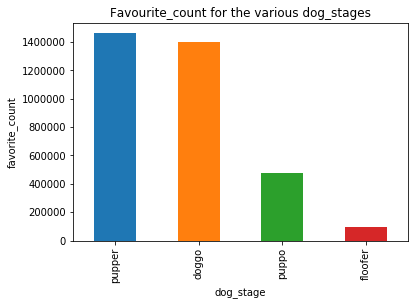

In [54]:
final_df.groupby('dog_stage').favorite_count.sum().nlargest(10).plot(kind='bar')
plt.ylabel("favorite_count")
plt.title("Favourite_count for the various dog_stages");


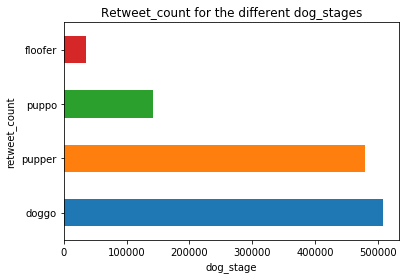

In [58]:
final_df.groupby('dog_stage').retweet_count.sum().nlargest(10).plot(kind='barh')
plt.xlabel("dog_stage")
plt.ylabel("retweet_count")
plt.title("Retweet_count for the different dog_stages");


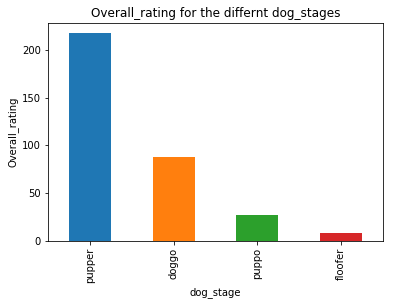

In [56]:
final_df.groupby('dog_stage').overall_rating.sum().nlargest(10).plot(kind='bar')
plt.ylabel("Overall_rating")
plt.title("Overall_rating for the differnt dog_stages");
